TASK 1 -- DATA ANALYST 

SALES DATA ANALYSIS FOR COMMERCIAL STORE

DATASET LINK PATH = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Internship_Works\retail_sales_dataset.csv");

In [159]:
df.shape

(1000, 9)

In [160]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [162]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


DATA CLEANING STEPS:-

1. CHECK FOR MISSING VALUES 
2. REMOVE DUPLICATES
3. CHECK FOR OUTLIERS
4. ENSURE CONSISTENT DATA TYPES

In [163]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [164]:
df.duplicated().sum()

0

In [165]:
# If Duplicates exist drop them
df.drop_duplicates()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [166]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [167]:
df.rename(columns=str.lower, inplace=True)

In [168]:
df.columns = df.columns.str.replace(' ', '_')
print(df)

     transaction_id        date customer_id  gender  age product_category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     quantity  price_per_unit  total_amount  
0           3              50

In [169]:
df

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [170]:
df[['quantity']].describe()

,quantity
count,1000.000000
mean,2.514000
std,1.132734
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,4.000000


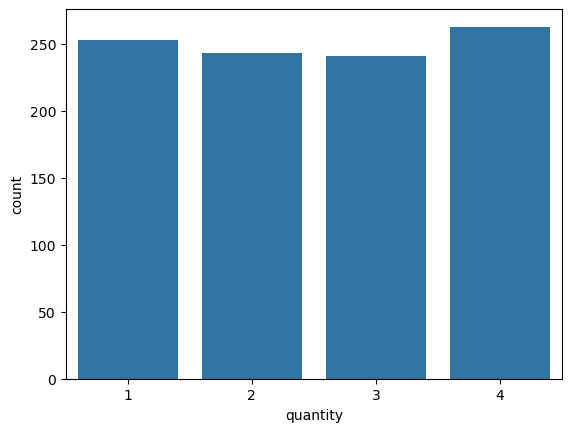

In [171]:
ax = sns.countplot(x='quantity', data=df)

In [172]:
result = df.groupby('gender').agg(total_amount = ('total_amount', 'sum'), total_quantity = ('quantity', 'sum')).reset_index()
print(result) 

   gender  total_amount  total_quantity
0  Female        232840            1298
1    Male        223160            1216


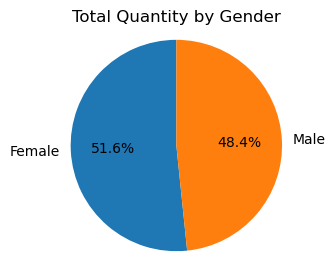

In [174]:
# Create a pie chart for total_quantity
plt.figure(figsize=(3, 3))
result.set_index('gender')['total_quantity'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Quantity by Gender')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.show()

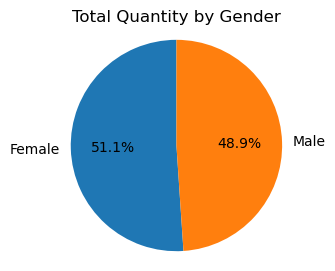

In [175]:
# Create a pie chart for total_amount
plt.figure(figsize=(3, 3))
result.set_index('gender')['total_amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Quantity by Gender')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.show()

In [177]:
Product = df.groupby('product_category').agg(total_quantity = ('quantity', 'sum')).reset_index()
print(Product)  

  product_category  total_quantity
0           Beauty             771
1         Clothing             894
2      Electronics             849


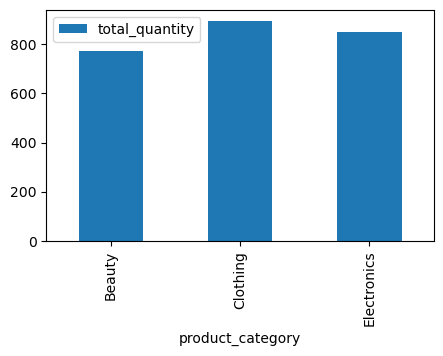

In [178]:
# Create a bar plot for these 

pt = Product.plot.bar(x='product_category', y='total_quantity')
pt.figure.set_size_inches(5, 3)

In [179]:
df 

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


FROM ABOVE DATA WE CAN CONCLUDE THAT THAT QUANTITY AND AMOUNT OF FEMALE PRODUCT IS MORE AS COMPARED TO MALE 
AND MOSTLY SOLD CATEGORY OF PRODUCT IS CLOTHING WHICH IS 894 THEN ELECTRONICS WHICH IS 849, MUTUALLY SLIGHT DIFFERENCE IS THEIR BETWEEN THESE TWO CATEGORY . THE LOWEST CATEGORY PRODUCT THAT IS SOLD IS BEAUTY (771). 